In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

 
# Configuración inicial
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 12})
np.random.seed(42)
 
# --------------------------------------------------
# Parte 1: Preparación de datos (NO MODIFICAR)
# --------------------------------------------------
def generar_datos():
    """Genera un dataset sintético con relaciones complejas"""
    # Datos de propiedades
    tamaño = np.random.normal(120, 30, 200)
    habitaciones = np.random.poisson(3, 200) + 1
    antigüedad = np.random.exponential(15, 200)
    precio_base = tamaño * 1500 + habitaciones * 8000 - antigüedad * 800
    precio = precio_base + np.random.normal(0, 20000, 200)
    # Datos de ubicación (con patrones ocultos)
    distancia_centro = np.random.gamma(5, 1.5, 200)
    transporte = 8 - 0.15 * distancia_centro + np.random.normal(0, 1, 200)
    seguridad = 6 + 0.1 * transporte + np.random.normal(0, 1, 200)
    # Variable de confusión: calidad de construcción
    calidad = np.random.normal(7, 1.5, 200)
    # Variables correlacionadas no causales
    helados = np.random.normal(100, 30, 200) + 5 * seguridad
    incendios = np.random.poisson(3, 200) + 0.2 * calidad
    return pd.DataFrame({
        'tamaño': tamaño,
        'habitaciones': habitaciones,
        'antigüedad': antigüedad,
        'precio': precio,
        'distancia_centro': distancia_centro,
        'transporte': transporte,
        'seguridad': seguridad,
        'calidad_construccion': calidad,
        'ventas_helados': helados,
        'incendios_reportados': incendios
    })
 
# Generar datos
df = generar_datos()

sc = StandardScaler()
scaled = sc.fit_transform(df)

In [31]:
df.head()

,tamaño,habitaciones,antigüedad,precio,distancia_centro,transporte,seguridad,calidad_construccion,ventas_helados,incendios_reportados
0,134.901425,6,5.681406,251200.399456,11.157876,6.516166,5.685304,6.742206,157.852125,3.348441
1,115.852071,9,11.631353,231871.895563,13.240030,6.590754,6.809211,5.337753,111.779172,2.067551
2,139.430656,5,23.461460,244531.127039,7.193397,8.782796,5.173401,6.692069,61.020195,5.338414
3,165.690896,2,5.757444,274381.189860,11.319832,5.225335,4.245542,10.501245,128.894921,5.100249
4,112.975399,4,14.748136,198863.169617,3.880944,7.068246,6.847653,7.437793,163.898340,5.487559


In [32]:
# --------------------------------------------------
# Parte 2: Análisis de visualización multivariada
# --------------------------------------------------
def ejercicio_visualizacion(df):
    
    """
    Completa las siguientes tareas:
    1. Crea un scatter plot multivariado que muestre:
       - Eje X: tamaño
       - Eje Y: precio
       - Color: seguridad (usar colormap 'coolwarm')
       - Tamaño de puntos: habitaciones (escalado *20)
    2. Personaliza el gráfico con título y etiquetas
    3. Interpreta la relación entre las variables
    """
    plt.figure(figsize=(10, 6))
    # TU CÓDIGO AQUÍ (reemplaza los None)
    scatter = plt.scatter(
        x= df['tamaño'],   # ¿Qué variable va en el eje X?
        y= df['precio'],   # ¿Qué variable va en el eje Y?
        c= df['seguridad'],   # ¿Qué variable representa el color?
        s= df['habitaciones'] *20,   # ¿Qué variable representa el tamaño? (recuerda escalar)
        alpha=0.7,
        cmap='coolwarm',
        edgecolor='k',
        linewidth=0.5
    )
    # Personalización
    plt.title('Relación entre tamaño, precio, seguridad y habitaciones', fontsize=14)
    plt.xlabel('Tamaño (m²)', fontsize=12)
    plt.ylabel('Precio (USD)', fontsize=12)
    # Leyendas
    cbar = plt.colorbar(scatter)
    cbar.set_label('Nivel de seguridad', fontsize=12)
    # Leyenda para habitaciones
    handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
    plt.legend(handles, [f"{int(float(l.split('{')[1].split('}')[0])/20):.0f}" for l in labels], 
               title="Habitaciones", loc='lower right')    
    plt.tight_layout()
    plt.savefig('ejercicio_scatter.jpg', dpi=150)
    plt.show()
    # Interpretación
    print("\nInterpretación del scatter plot:")
    print("¿Qué relación observas entre tamaño y precio?")
    print("¿Cómo se relaciona la seguridad con estas variables?")
    print("¿Qué patrón observas con respecto al número de habitaciones?")
 

In [33]:
# --------------------------------------------------
# Parte 3: Análisis de correlación con heatmap
# --------------------------------------------------
def ejercicio_correlacion(df):
    """
    Completa las siguientes tareas:
    1. Calcula la matriz de correlación para las variables numéricas
    2. Genera un heatmap de correlaciones con:
       - Anotaciones con 2 decimales
       - Mapa de color 'coolwarm'
       - Máscara para el triángulo superior
    3. Identifica las 3 correlaciones más fuertes (positivas y negativas)
    4. Identifica una correlación que podría ser espuria
    """
    # Seleccionar solo variables numéricas
    numeric_df = df.select_dtypes(include=[np.number])
    # TU CÓDIGO AQUÍ

    corr_matrix = df.corr()
    plt.figure(figsize=(12, 10))

    # Crear máscara para el triángulo superior
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    # Generar heatmap
    sns.heatmap(
        corr_matrix,
        mask= mask,   # ¿Qué máscara usar?
        annot=True,  # ¿Mostrar valores? (booleano)
        fmt= '.2f',    # Formato de anotaciones
        cmap='coolwarm',   # Mapa de color
        vmin=-1,
        vmax=1,
        center=0,
        square=True,
        linewidths=.5,
        cbar_kws={"shrink": .8}
    )
    plt.title('Matriz de Correlación - Variables de Propiedades', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('ejercicio_heatmap.jpg', dpi=150)
    plt.show()
    # Análisis de correlaciones
    print("\nAnálisis de correlaciones:")
    # Encuentra las 3 correlaciones más fuertes (positivas)
    print("\nCorrelaciones positivas más fuertes:")
    # (Tu código para identificar las mayores correlaciones positivas)
    print("\nCorrelaciones negativas más fuertes:")
    # (Tu código para identificar las mayores correlaciones negativas)
    print("\nCorrelación espuria identificada:")
    print("¿Por qué crees que esta correlación podría no ser causal?")


In [34]:
df.head(20)

,tamaño,habitaciones,antigüedad,precio,distancia_centro,transporte,seguridad,calidad_construccion,ventas_helados,incendios_reportados
0,134.901425,6,5.681406,251200.399456,11.157876,6.516166,5.685304,6.742206,157.852125,3.348441
1,115.852071,9,11.631353,231871.895563,13.240030,6.590754,6.809211,5.337753,111.779172,2.067551
2,139.430656,5,23.461460,244531.127039,7.193397,8.782796,5.173401,6.692069,61.020195,5.338414
3,165.690896,2,5.757444,274381.189860,11.319832,5.225335,4.245542,10.501245,128.894921,5.100249
4,112.975399,4,14.748136,198863.169617,3.880944,7.068246,6.847653,7.437793,163.898340,5.487559
5,112.975891,1,32.570425,163557.783576,3.115291,7.794369,7.880035,8.349197,98.856800,3.669839
6,167.376384,1,14.351348,228696.123038,17.581549,6.510177,6.903955,9.941037,154.626369,3.988207
7,143.023042,3,3.978235,241816.890354,9.622488,6.252403,6.561794,8.691037,153.117963,5.738207
8,105.915768,5,0.370551,223561.247018,6.212715,8.266734,6.639139,6.328128,64.990809,5.265626
9,136.276801,2,30.614725,205751.513065,8.348914,4.810301,5.538465,5.086252,99.603664,2.017250


In [35]:
# --------------------------------------------------
# Parte 4: Análisis de causalidad
# --------------------------------------------------
def ejercicio_causalidad(df):
    """
    Completa las siguientes tareas:
    1. Identifica dos variables con alta correlación pero relación no causal
    2. Genera un gráfico que muestre la relación engañosa
    3. Identifica la variable de confusión que explica la relación
    4. Demuestra la relación real con un gráfico adicional
    """
    # Ejemplo de variables con correlación engañosa
    var1 = 'distancia_centro'
    var2 = 'transporte'
    plt.figure(figsize=(10, 6))
    # Gráfico de la correlación engañosa
    sns.regplot(x=var1, y=var2, data=df, scatter_kws={'alpha':0.6})
    plt.title(f'Correlación engañosa: {var1} vs {var2}', fontsize=14)
    plt.xlabel('Ventas de helados', fontsize=12)
    plt.ylabel('Incendios reportados', fontsize=12)
    plt.savefig('correlacion_enganosa.jpg', dpi=150)
    plt.show()
    # Análisis
    print("\nAnálisis de causalidad:")
    print(f"Correlación observada: {df[var1].corr(df[var2]):.2f}")
    print("¿Por qué esta correlación probablemente no es causal?")
    
    # Variable de confusión
    confounder = 'seguridad'  # ¿Qué variable explica ambas?
    # Gráfico que muestra la relación real
    plt.figure(figsize=(10, 6))
    # TU CÓDIGO AQUÍ

    scatter = plt.scatter(
            x= scaled['distancia_centro'],   # ¿Qué variable va en el eje X?
            y= scaled['transporte'],   # ¿Qué variable va en el eje Y?
            c= scaled['seguridad'],   # ¿Qué variable representa el color?
            s= scaled['precio'] /100,   # ¿Qué variable representa el tamaño? (recuerda escalar)
            alpha=0.7,
            cmap='coolwarm',
            edgecolor='k',
            linewidth=0.5
    )

    # Crea un scatter plot que muestre la relación con la variable de confusión
    # Puedes usar color para representar la variable de confusión
    plt.title(f'Relación real explicada por {confounder}', fontsize=14)
    plt.xlabel('Ventas de helados', fontsize=12)
    plt.ylabel('Incendios reportados', fontsize=12)
    plt.savefig('explicacion_causal.jpg', dpi=150)
    plt.show()
    print(f"\nExplicación: La variable de confusión es '{confounder}'")
    print("¿Cómo explica esta variable ambas tendencias observadas?")

ANÁLISIS DE DATOS: VISUALIZACIÓN MULTIVARIADA Y CORRELACIÓN

[PARTE 1: SCATTER PLOT MULTIVARIADO]


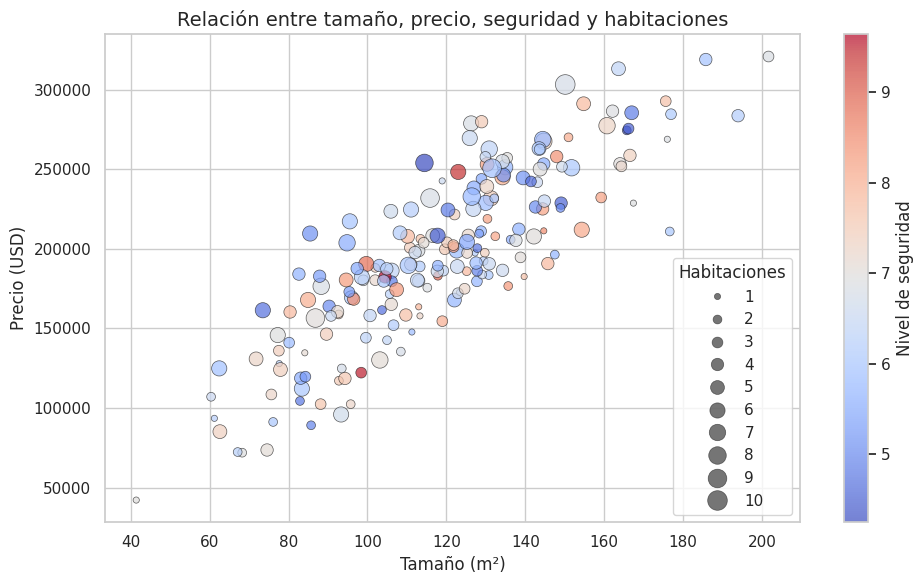


Interpretación del scatter plot:
¿Qué relación observas entre tamaño y precio?
¿Cómo se relaciona la seguridad con estas variables?
¿Qué patrón observas con respecto al número de habitaciones?

[PARTE 2: HEATMAP DE CORRELACIONES]


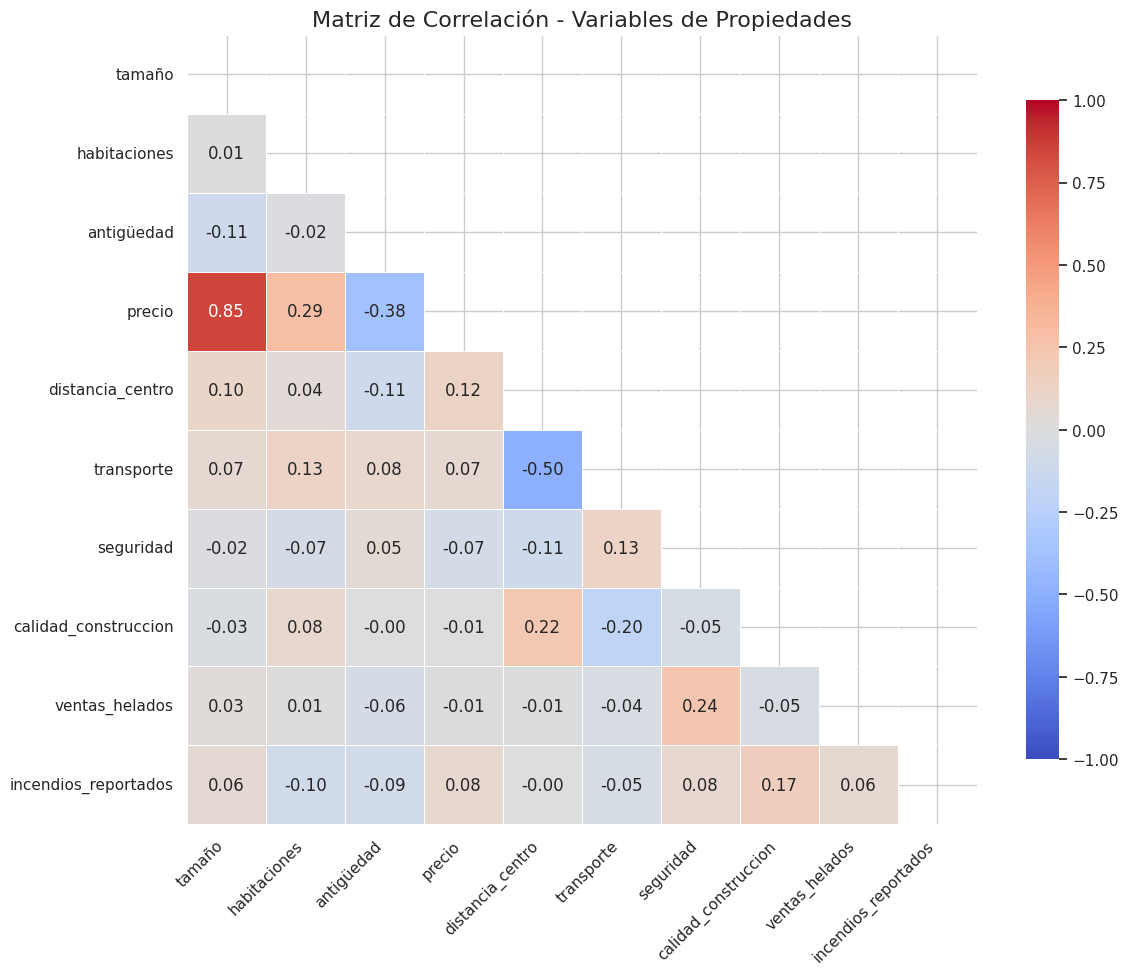


Análisis de correlaciones:

Correlaciones positivas más fuertes:

Correlaciones negativas más fuertes:

Correlación espuria identificada:
¿Por qué crees que esta correlación podría no ser causal?

[PARTE 3: ANÁLISIS DE CAUSALIDAD]


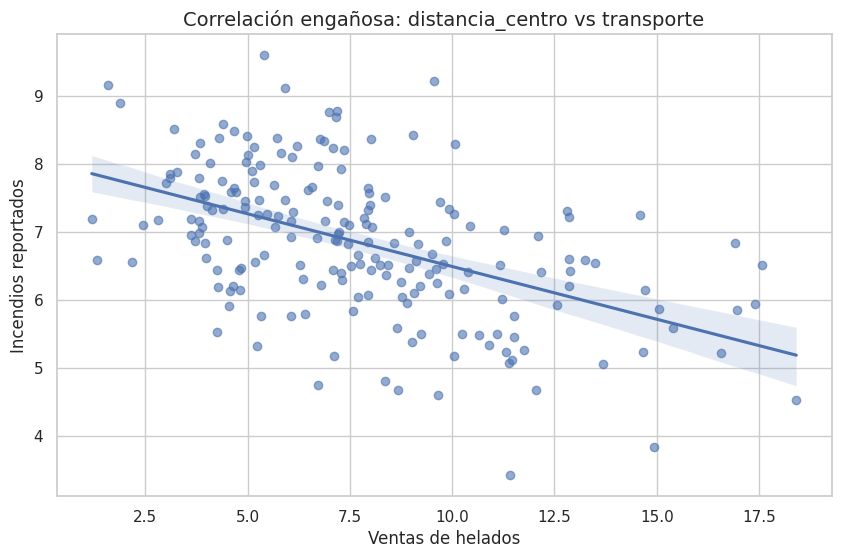


Análisis de causalidad:
Correlación observada: -0.50
¿Por qué esta correlación probablemente no es causal?


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1000x600 with 0 Axes>

In [36]:
 # --------------------------------------------------
# Ejecución de los ejercicios
# --------------------------------------------------
print("="*70)
print("ANÁLISIS DE DATOS: VISUALIZACIÓN MULTIVARIADA Y CORRELACIÓN")
print("="*70)
 
print("\n[PARTE 1: SCATTER PLOT MULTIVARIADO]")
ejercicio_visualizacion(df.copy())
 
print("\n[PARTE 2: HEATMAP DE CORRELACIONES]")
ejercicio_correlacion(df.copy())
 
print("\n[PARTE 3: ANÁLISIS DE CAUSALIDAD]")
ejercicio_causalidad(df.copy())
 
print("\n¡Actividad completada! Analiza los gráficos generados y responde las preguntas.")